In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# promoter signal testing
# k_on is exponential distribution clustering paramter for on states, k_off for off
# duration is the total simulation duration
def telegraph(k_on, k_off, sig_init, t_step, duration):
    signal = []
    time = []
    
    signal = [sig_init] # add in the initial signal
    time = [0]
    if sig_init == 1:     # if our initial condition is an ON signal, start from there
        k_init = k_on
        k = k_on
    if sig_init == 0: 
        k_init = k_off
        k = k_off
    time += [np.random.exponential(k_init)*t_step]
    signal += [1]
    
    for i in range(duration//t_step):
        if k == k_off:
            signal += [1] 
            time += [time[i-1] + (np.random.exponential(k_on) * t_step)]
            k = k_on
        if k == k_on:
            time += [time[i-1] + (np.random.exponential(k_off) * t_step)]
            signal += [0]
            k = k_off
    return np.asarray(time),np.asarray(signal)
    

In [446]:
# promoter signal testing: simulate a signal as a step function that oscillates between 0 "OFF" and 1 "ON" with
# OFF and ON wait times distributed according to respective exponential probability distributions.

def telegraph(k_on, k_off, duration, stepsize):
# k_on is exponential distribution clustering paramter for "ON" states, k_off for "OFF"
# duration is the total simulation time, in seconds
# stepsize is the number of seconds per step (e.g. 3 seconds per observation)

    on_off = np.zeros((duration//stepsize))                                             # create array of on-off durations
    on_off[0::2] = np.random.exponential(scale=(1./k_off), size=len(on_off[0::2]))      # fill every other value with exponentially-distributed off durations
    on_off[1::2] = np.random.exponential(scale=(1./k_on), size=len(on_off[1::2]))       # then fill in every other place with "ON" durations

    promoter_arr = np.zeros((duration//stepsize))
        
    signal = 0           # start in the off state
    t0 = 0               # start at t0
    t1 = 0               # step size to be chosen in loop
    
    step_arr = np.zeros(duration//stepsize)
                                
    for i in range(len(promoter_arr)):
        t1 = int(on_off[i] / stepsize)              # find the time until which the signal remains in its state
        promoter_arr[t0:(t0 + t1)] = signal         # for the given duration of the ith state, fill the value with either "ON" or "OFF" values
        signal = 1 - signal                         # change the signal by flipping the switch to either 1 or 0.
        t0 = t0 + t1
        step_arr[i] = t0                            # 

    return promoter_arr                             # returns telegraph signal of promoter indexed by stepsize (discrete steps).
    

In [447]:
sig = telegraph(0.03, 0.03, 555, 3)

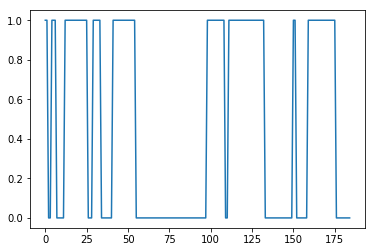

In [448]:
plt.plot(sig)

In [445]:
sig

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.])

In [ ]:
# now add in signal agglomeration. When the signal is 1, start the agglomeration of molecules at a given rate k_gfp.
# needed parameters

def gfp_signal(telegraph, k_gfp, cts_per_gfp, pol_per_timestep, max_gfp stepsize):
    
    # get k_gfp from molecules / sec to molecules / step
    k_gfp_step = k_gfp / stepsize

    molecules = np.zeros(len(telegraph))
    t = []
    dt = 0
    t0 = 0
    t1 = 0
    pol_arr = []    # array to keep track of the in-progress pol IIs
    
    for i in range(len(telegraph)):
        if telegraph[i] == 1:   # if at a step i the signal is ON, start a pol II molecule
            pol_arr = np.append(pol_arr, [0])
            
        
        for j in pol_arr
            
            t0 = t1  # increment the step to the next one
            
        molecules[i] = k_gfp_step * (t1-t1)     # integrate along the step
            
            
        